In [48]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# File to Load
suicide_rates_1985_2021 = Path("Resources/suicide_rates_1985-2021.csv")

suicide_rates_df = pd.read_csv(suicide_rates_1985_2021)
suicide_rates_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [50]:
# Columns
suicide_rates_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [51]:
# Remove "HDI for year" column 
suicide_rates_df = suicide_rates_df.drop('HDI for year', axis=1)
suicide_rates_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,"2,15,66,24,900",796.0,Boomers


In [52]:
# Total number of countries
country_count = suicide_rates_df['country'].nunique()
country_count

114

In [53]:
suicide_rates_df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no           float64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)    float64
generation             object
dtype: object

In [54]:
suicide_rates_1990 = suicide_rates_df[suicide_rates_df['year'] == 1990]
suicide_rates_1990_cleaned=suicide_rates_1990.dropna()
grouped_by_year_1990 = pd.DataFrame(suicide_rates_1990.groupby('country')['suicides_no'].sum())
grouped_by_year_1990

,suicides_no
country,
Antigua and Barbuda,1.0
Argentina,2140.0
Armenia,93.0
Australia,2202.0
Austria,1825.0
...,...
Ukraine,10645.0
United Kingdom,4643.0
United States,30895.0


In [55]:
suicide_rates_2019 = suicide_rates_df[suicide_rates_df['year'] == 2019]
suicide_rates_2019_cleaned=suicide_rates_2019.dropna()
grouped_by_year_2019 = pd.DataFrame(suicide_rates_2019_cleaned.groupby('country')['suicides_no'].sum())
grouped_by_year_2019

,suicides_no
country,
Argentina,3254.0
Armenia,49.0
Australia,3318.0
Austria,1113.0
Brazil,9892.0
Brunei Darussalam,8.0
Bulgaria,573.0
Canada,4449.0
Colombia,2930.0


In [56]:
common_country_list = set(grouped_by_year_1990.index) & set(grouped_by_year_2019.index)
grouped_by_year_1990 = grouped_by_year_1990[grouped_by_year_1990.index.isin(common_country_list)]
grouped_by_year_1990

,suicides_no
country,
Argentina,2140.0
Armenia,93.0
Australia,2202.0
Austria,1825.0
Brazil,4803.0
Bulgaria,1323.0
Canada,3378.0
Colombia,865.0
Costa Rica,157.0


In [57]:
grouped_by_year_2019 = grouped_by_year_2019[grouped_by_year_2019.index.isin(common_country_list)]
grouped_by_year_2019

,suicides_no
country,
Argentina,3254.0
Armenia,49.0
Australia,3318.0
Austria,1113.0
Brazil,9892.0
Bulgaria,573.0
Canada,4449.0
Colombia,2930.0
Costa Rica,383.0


In [74]:
grouped_by_year_2019.groupby(["country"])[["suicides_no"]]
suicide_rates_2019

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
27902,Antigua and Barbuda,2019,male,5-14 years,NaN,92117,0.000000,Antigua and Barbuda2019,1687533333,17376.649680,Generation X
27903,Argentina,2019,male,5-14 years,39.0,44938712,0.086785,Argentina2019,4.52E+11,10056.637940,Generation X
27904,Armenia,2019,male,5-14 years,0.0,2820602,0.000000,Armenia2019,13619291361,4604.646324,Generation X
27905,Australia,2019,male,5-14 years,10.0,25340217,0.039463,Australia2019,1.39E+12,54875.285960,Generation X
27906,Austria,2019,male,5-14 years,1.0,8879920,0.011261,Austria2019,4.45E+11,50114.401110,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
31587,Ukraine,2019,female,75+ years,264.0,44386203,0.594779,Ukraine2019,1.54E+11,3661.456204,G.I. Generation
31588,United Kingdom,2019,female,75+ years,85.0,66836327,0.127176,United Kingdom2019,2.88E+12,43070.498360,G.I. Generation
31589,United States of America,2019,female,75+ years,568.0,328329953,0.172997,United States of America2019,2.14E+13,65279.529030,G.I. Generation
31590,Uruguay,2019,female,75+ years,23.0,3428409,0.670865,Uruguay2019,61231149881,17688.015010,G.I. Generation


In [77]:

summery_df = suicide_rates_df.groupby(["country"])[["suicides/100k pop"]].agg(["mean", "median", "var", "std", "sem"])
summery_df.head()

suicides/100k pop                                   \
                                      mean    median         var        std   
country                                                                       
Albania                           3.502879  2.970000   11.778946   3.432047   
Antigua and Barbuda               0.481559  0.000000   10.018676   3.165229   
Argentina                         9.324805  4.680000  133.655526  11.560948   
Armenia                           2.836908  1.355000   13.675197   3.697999   
Aruba                             9.503095  0.000000  625.830928  25.016613   
...                                    ...       ...         ...        ...   
United Kingdom                    6.700319  4.255000   38.143702   6.176059   
United States                    13.819812  6.890000  175.029586  13.229875   
United States of America          0.388990  0.455335    0.035414   0.188186   
Uruguay                          17.189690  8.560000  488.595300  22.104192   
Uzbekistan                        6.921306  5.175000   40.479895   6.362381   

                                    
                               sem  
country                             
Albania                   0.211228  
Antigua and Barbuda       0.164109  
Argentina                 0.564117  
Armenia                   0.198806  
Aruba                     1.930074  
...                            ...  
United Kingdom            0.301361  
United States             0.685937  
United States of America  0.027162  
Uruguay                   1.128000  
Uzbekistan                0.360199  

[114 rows x 5 columns]

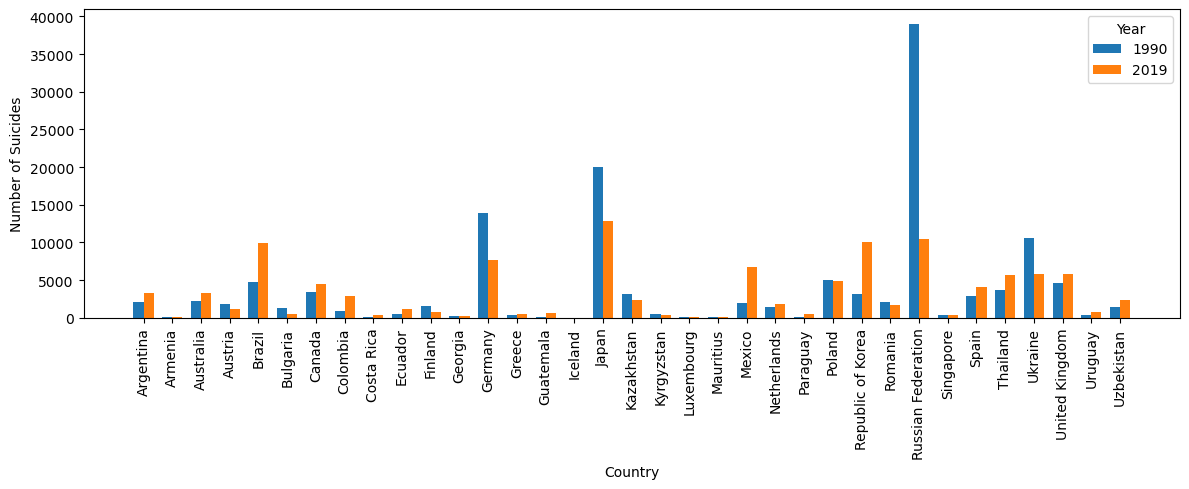

In [79]:
# Create an array of country names
countries = grouped_by_year_1990.index

# Create an array of indices to position the bars for 1990 and 2019
x = np.arange(len(countries))

# Width of each bar
width = 0.35

# Create subplots for side-by-side comparison
fig, ax = plt.subplots(figsize=(12, 5))

# Plot for 1990
ax.bar(x - width/2, grouped_by_year_1990['suicides_no'], width, label='1990')
# Plot for 2019
ax.bar(x + width/2, grouped_by_year_2019['suicides_no'], width, label='2019')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Suicides')

# Set the legend
ax.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()

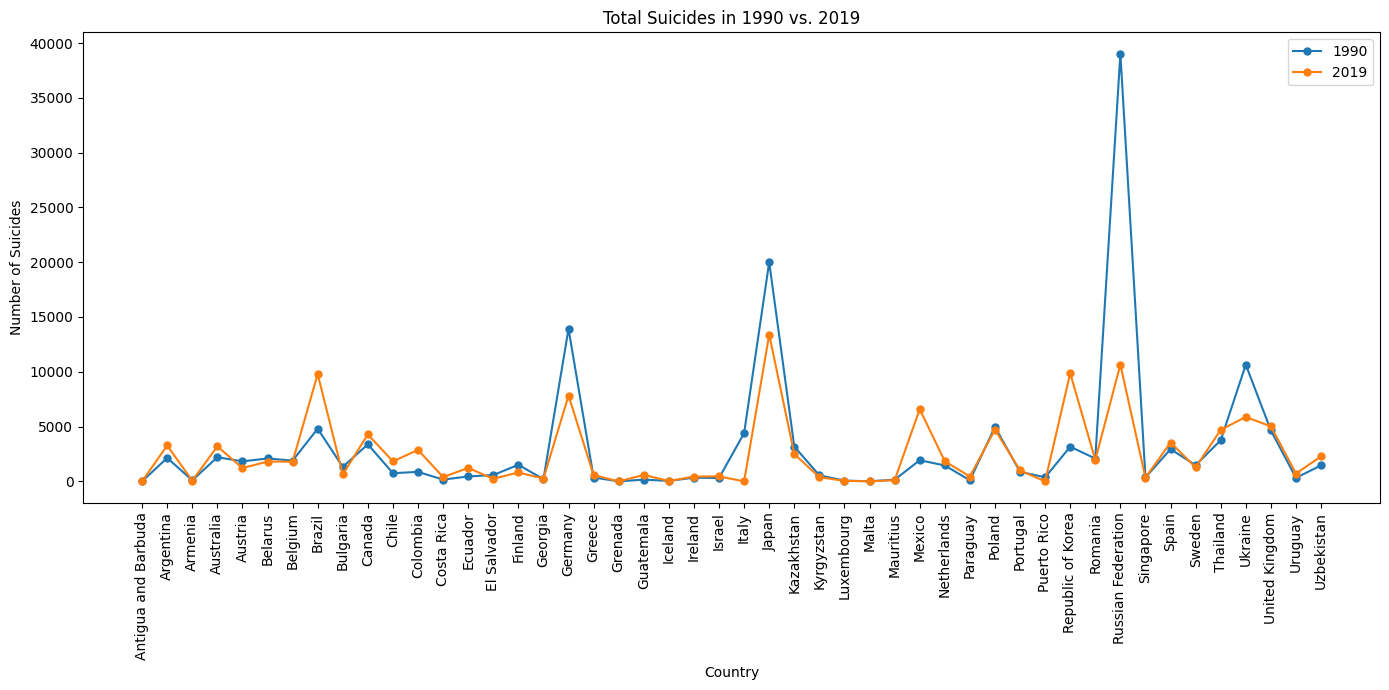

In [99]:
x = np.arange(len(countries))
plt.figure(figsize=(14, 7))

# line plot for 1990
plt.plot(x,grouped_by_year_1990_common['suicides_no'], label='1990', marker='o',markersize=5)

# line plot for 2019
plt.plot(x,grouped_by_year_2019_common['suicides_no'], label='2019', marker='o',markersize=5)

# Set x-axis labels and title
plt.xticks(x,countries, rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Suicides')
plt.title('Total Suicides in 1990 vs. 2019')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()